In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
df=pd.read_csv('Tornadoes.csv').rename({'yr':'Year','fat':'Fatalities','loss':'Property Losses','inj':'Injuries','mag':'EF','closs':'Crop Loss','st':'State'},axis=1)
df

,om,Year,mo,dy,date,time,tz,State,stf,stn,...,Fatalities,Property Losses,Crop Loss,slat,slon,elat,elon,len,wid,fc
0,192,1950,10,1,10/1/1950,21:00:00,3,OK,40,23,...,0,4.0,0.0,36.7300,-102.5200,36.8800,-102.3000,15.80,10,0
1,193,1950,10,9,10/9/1950,2:15:00,3,NC,37,9,...,0,5.0,0.0,34.1700,-78.6000,0.0000,0.0000,2.00,880,0
2,195,1950,11,20,11/20/1950,2:20:00,3,KY,21,1,...,0,5.0,0.0,37.3700,-87.2000,0.0000,0.0000,0.10,10,0
3,196,1950,11,20,11/20/1950,4:00:00,3,KY,21,2,...,0,5.0,0.0,38.2000,-84.5000,0.0000,0.0000,0.10,10,0
4,197,1950,11,20,11/20/1950,7:30:00,3,MS,28,14,...,0,4.0,0.0,32.4200,-89.1300,0.0000,0.0000,2.00,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68863,620523,2021,9,8,9/8/2021,15:32:00,3,PA,42,0,...,0,0.0,0.0,40.7586,-77.0062,40.7507,-76.9959,0.73,30,0
68864,620524,2021,9,8,9/8/2021,15:35:00,3,PA,42,0,...,0,20000.0,0.0,40.7529,-76.9131,40.7561,-76.8878,1.45,30,0
68865,620525,2021,9,8,9/8/2021,19:08:00,3,FL,12,0,...,0,0.0,0.0,30.1599,-84.4497,30.1775,-84.4629,1.45,50,0
68866,620526,2021,9,9,9/9/2021,2:10:00,3,CT,9,0,...,0,40000.0,0.0,41.7500,-72.2990,41.7570,-72.2880,0.75,75,0


In [3]:
df['EF'].unique()

array([1, 3, 2, 4, 0, 5])

In [4]:
df.describe()

,om,Year,mo,dy,tz,stf,stn,EF,Injuries,Fatalities,Property Losses,Crop Loss,slat,slon,elat,elon,len,wid,fc
count,68868.00000,68868.000000,68868.000000,68868.000000,68868.000000,68868.000000,68868.000000,68868.000000,68868.000000,68868.000000,6.886800e+04,6.886800e+04,68868.000000,68868.000000,68868.000000,68868.000000,68868.000000,68868.000000,68868.000000
mean,105617.44838,1991.396643,5.969754,15.918743,3.000958,29.217808,23.386391,0.792777,1.613333,0.104983,1.079698e+05,8.648430e+02,37.077649,-92.565051,22.940362,-56.715304,3.631119,110.471975,0.027066
std,219322.26972,19.370558,2.446197,8.746061,0.072295,14.999598,31.804416,0.919074,20.333618,1.630749,8.910674e+06,6.518477e+04,5.320210,9.550141,18.544657,45.343840,8.655829,213.747945,0.162278
min,1.00000,1950.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-163.530000,0.000000,-163.530000,0.000000,0.000000,0.000000
25%,278.00000,1976.000000,4.000000,8.000000,3.000000,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,33.220000,-98.400000,0.000000,-94.670000,0.120000,20.000000,0.000000
50%,578.00000,1994.000000,6.000000,16.000000,3.000000,28.000000,12.000000,1.000000,0.000000,0.000000,1.000000e-01,0.000000e+00,37.000000,-93.500000,32.600000,-84.670000,0.800000,50.000000,0.000000
75%,1078.00000,2008.000000,7.000000,24.000000,3.000000,42.000000,31.000000,1.000000,0.000000,0.000000,4.000000e+00,0.000000e+00,40.920000,-86.659300,38.650000,0.000000,3.320000,100.000000,0.000000
max,620937.00000,2021.000000,12.000000,31.000000,9.000000,78.000000,232.000000,5.000000,1740.000000,158.000000,1.550000e+09,1.225000e+07,61.020000,0.000000,61.020000,0.000000,234.700000,4576.000000,1.000000


In [5]:
df.isnull().any()

om                 False
Year               False
mo                 False
dy                 False
date               False
time               False
tz                 False
State              False
stf                False
stn                False
EF                 False
Injuries           False
Fatalities         False
Property Losses    False
Crop Loss          False
slat               False
slon               False
elat               False
elon               False
len                False
wid                False
fc                 False
dtype: bool

In [6]:
df. dropna ( axis = 'index' , how = 'any' , inplace = True )

In [7]:
df.isnull().any()

om                 False
Year               False
mo                 False
dy                 False
date               False
time               False
tz                 False
State              False
stf                False
stn                False
EF                 False
Injuries           False
Fatalities         False
Property Losses    False
Crop Loss          False
slat               False
slon               False
elat               False
elon               False
len                False
wid                False
fc                 False
dtype: bool

In [8]:
df=df.copy()
df=df.drop(['date','stn','om','fc','tz','stf'],axis=1)
df['time']=pd.to_datetime(df['time'])
df['hour']=df['time'].apply(lambda x:x.hour)
df['minute']=df['time'].apply(lambda x:x.minute)
df=df.drop('time',axis=1)
df

,Year,mo,dy,State,EF,Injuries,Fatalities,Property Losses,Crop Loss,slat,slon,elat,elon,len,wid,hour,minute
0,1950,10,1,OK,1,0,0,4.0,0.0,36.7300,-102.5200,36.8800,-102.3000,15.80,10,21,0
1,1950,10,9,NC,3,3,0,5.0,0.0,34.1700,-78.6000,0.0000,0.0000,2.00,880,2,15
2,1950,11,20,KY,2,0,0,5.0,0.0,37.3700,-87.2000,0.0000,0.0000,0.10,10,2,20
3,1950,11,20,KY,1,0,0,5.0,0.0,38.2000,-84.5000,0.0000,0.0000,0.10,10,4,0
4,1950,11,20,MS,1,3,0,4.0,0.0,32.4200,-89.1300,0.0000,0.0000,2.00,37,7,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68863,2021,9,8,PA,1,0,0,0.0,0.0,40.7586,-77.0062,40.7507,-76.9959,0.73,30,15,32
68864,2021,9,8,PA,0,0,0,20000.0,0.0,40.7529,-76.9131,40.7561,-76.8878,1.45,30,15,35
68865,2021,9,8,FL,0,0,0,0.0,0.0,30.1599,-84.4497,30.1775,-84.4629,1.45,50,19,8
68866,2021,9,9,CT,0,0,0,40000.0,0.0,41.7500,-72.2990,41.7570,-72.2880,0.75,75,2,10


In [9]:
for column in df.columns:
    missing_cnt = df[column][df[column] == 0].count()
    print('Zero/Unknown Values in column {col} = '.format(col = column) , missing_cnt )

Zero/Unknown Values in column Year =  0
Zero/Unknown Values in column mo =  0
Zero/Unknown Values in column dy =  0
Zero/Unknown Values in column State =  0
Zero/Unknown Values in column EF =  32200
Zero/Unknown Values in column Injuries =  60806
Zero/Unknown Values in column Fatalities =  67169
Zero/Unknown Values in column Property Losses =  26924
Zero/Unknown Values in column Crop Loss =  67923
Zero/Unknown Values in column slat =  129
Zero/Unknown Values in column slon =  129
Zero/Unknown Values in column elat =  26494
Zero/Unknown Values in column elon =  26494
Zero/Unknown Values in column len =  253
Zero/Unknown Values in column wid =  608
Zero/Unknown Values in column hour =  1033
Zero/Unknown Values in column minute =  9100


In [10]:
df.loc[df['Year']<1996,['EF','Property Losses']].head()

,EF,Property Losses
0,1,4.0
1,3,5.0
2,2,5.0
3,1,5.0
4,1,4.0


In [11]:
df.loc[df['Year']>=1996,['EF','Property Losses']].head()

,EF,Property Losses
36003,0,0.00
36004,1,0.04
36005,1,3.00
36006,0,0.12
36007,0,0.00


In [12]:
df.loc[df['Year']<1996].groupby('EF')['Property Losses'].agg([np.mean,np.max,np.std])

,mean,amax,std
EF,,,
0,1.231507,7.0,1.644630
1,3.214137,8.0,1.717484
2,4.002811,8.0,1.624130
3,4.687968,8.0,1.722215
4,5.210054,8.0,2.065659
5,5.098592,8.0,2.705312


In [13]:
df.loc[df['Year']>=1996].groupby('EF')['Property Losses'].agg([np.mean,np.max,np.std])

,mean,amax,std
EF,,,
0,4.615809e+03,5.780000e+06,6.943068e+04
1,4.848547e+04,1.603000e+07,4.279647e+05
2,3.842051e+05,4.000000e+08,7.925701e+06
3,6.505087e+06,1.550000e+09,8.015223e+07
4,4.411409e+06,5.000000e+08,3.903314e+07
5,5.318106e+02,2.800100e+03,8.469391e+02


In [14]:
def LossApprox(cols):
    Loss=cols[0]
    EF=cols[1]
    Year=cols[2]
    if Year>1995:
        if Loss<0.00005:
            Loss=1
        elif Loss>=0.00005 and Loss<0.0005:
            Loss=2
        elif Loss>=0.0005 and Loss<0.005:
            Loss=3
        elif Loss>=0.005 and Loss<0.05:
            Loss=4
        elif Loss>=0.05 and Loss<0.5:
            Loss=5
        elif Loss>=0.5 and Loss<5: 
            Loss=6
        elif  Loss>=5 and Loss<50: 
            Loss=7
        elif Loss>=50 and Loss<500: 
            Loss=8
        elif Loss>=500 and Loss<5000: 
            Loss=9
    if Loss==0:
        if EF==0:
            Loss=1
        elif EF==1:
            Loss=3
        elif EF==2:
            Loss=4
        elif EF==3:
            Loss=5
        elif EF==4:
            Loss=6
        elif EF==5:
            Loss=7
    return int(Loss)
df['Property Losses'] = df[['Property Losses', 'EF','Year']].apply(LossApprox, axis=1)
print('Number of Missing Property Losses Values:')
print(df.loc[df['Property Losses']==0,['EF','Year','Property Losses']].head(10))
print('Property Losses after data processing:')
df.loc[:,['EF','Year','Property Losses']].head()

Number of Missing Property Losses Values:
Empty DataFrame
Columns: [EF, Year, Property Losses]
Index: []
Property Losses after data processing:


,EF,Year,Property Losses
0,1,1950,4
1,3,1950,5
2,2,1950,5
3,1,1950,5
4,1,1950,4


In [15]:
df.loc[df['Year']<2005].groupby('EF')['Crop Loss'].agg([np.mean,np.max,np.std])

,mean,amax,std
EF,,,
0,0.00000,0.0,0.000000
1,0.00000,0.0,0.000000
2,0.00005,0.4,0.004476
3,0.00000,0.0,0.000000
4,0.00000,0.0,0.000000
5,0.00000,0.0,0.000000


In [16]:
df.loc[df['Year']>2000].groupby('EF')['Crop Loss'].agg([np.mean,np.max,np.std])

,mean,amax,std
EF,,,
0,104.636787,1.550000e+05,2.446609e+03
1,2240.971559,7.500000e+06,8.647984e+04
2,6712.528477,2.000000e+06,7.946475e+04
3,15292.866816,7.701000e+06,3.142063e+05
4,110833.785797,1.225000e+07,1.062865e+06
5,0.019333,2.320000e-01,6.697263e-02


In [17]:
def croplossapprox(cols):
    closs=cols[0]
    EF=cols[1]
    Year=cols[2]
    closs=closs*10**6
    if Year>1999:
        if closs<50:
            closs=1
        elif closs>=50 and closs<500:
            closs=2
        elif closs>=500 and closs<5000:
            closs=3
        elif closs>=5000 and closs<50000:
            closs=4
        elif closs>=50000 and closs<500000:
            closs=5
        elif closs>=500000 and closs<5000000:
            closs=6
        elif closs>=5000000 and closs<50000000:
            closs=7
    if closs==0:
        if EF==0:
            closs=3
        elif EF==1:
            closs=4
        elif EF==2:
            closs=4
        elif EF==3:
            closs=5
        elif EF==4:
            closs=6
        elif EF==5:
            closs=4
    return int(closs)
df['Crop Loss'] = df[['Crop Loss', 'EF','Year']].apply(croplossapprox, axis=1)
print('Number of Missing Crop Loss Values:')
print(df.loc[df['Crop Loss']==0,['EF','Year','Crop Loss']].head(10))
print('Property Losses after data processing:')
df.loc[:,['EF','Year','Crop Loss']].head()

Number of Missing Crop Loss Values:
Empty DataFrame
Columns: [EF, Year, Crop Loss]
Index: []
Property Losses after data processing:


,EF,Year,Crop Loss
0,1,1950,4
1,3,1950,5
2,2,1950,4
3,1,1950,4
4,1,1950,4


In [18]:
df.groupby('EF')['len'].agg([np.mean,np.max,np.std])

,mean,amax,std
EF,,,
0,1.106726,103.5,2.670596
1,3.342882,176.4,5.907602
2,7.263695,234.7,11.478934
3,15.275194,169.7,17.777665
4,27.054233,202.1,29.541156
5,35.563409,202.5,34.806035


In [19]:
df.groupby('EF')['wid'].agg([np.mean,np.max,np.std])

,mean,amax,std
EF,,,
0,45.898727,2500,73.468033
1,112.729060,3000,171.089164
2,194.886593,3520,279.175022
3,390.793314,4576,462.612754
4,605.008219,4400,602.057708
5,755.045455,3000,579.541751


In [20]:
def lenapprox(col):
    len=col[0]
    EF=col[1]
    if len==0:
        if EF==0:
            len=1.020364
        elif EF==1:
            len=3.197955
        elif EF==2:
            len=6.959467
        elif EF==3:
            len=14.963802
        elif EF==5:
            len=27.560850
    return len
df['len'] = df[['len', 'EF']].apply(lenapprox, axis=1)
print('Number of Missing Length Values:')
print(df.loc[df['len']==0,['EF','Year','len']].head(10))
print('Length after data processing:')
df.loc[:,['EF','Year','len']].head(10)

Number of Missing Length Values:
       EF  Year  len
905     4  1953  0.0
1081    4  1953  0.0
2343    4  1956  0.0
2504    4  1956  0.0
8641    4  1965  0.0
9206    4  1966  0.0
10791   4  1968  0.0
11280   4  1969  0.0
11977   4  1970  0.0
11979   4  1970  0.0
Length after data processing:


,EF,Year,len
0,1,1950,15.8
1,3,1950,2.0
2,2,1950,0.1
3,1,1950,0.1
4,1,1950,2.0
5,3,1950,15.9
6,2,1950,18.8
7,3,1950,18.0
8,3,1950,7.8
9,1,1950,9.6


In [21]:
def widapprox(col):
    wid=col[0]
    EF=col[1]
    if wid==0:
        if EF==0:
            wid=42
        elif EF==1:
            wid=96
        elif EF==2:
            wid=176
        elif EF==3:
            wid=363
        elif EF==4:
            wid=589
        elif EF==5:
            wid=839
    return wid
df['wid'] = df[['wid', 'EF']].apply(lenapprox, axis=1)
print('Number of Missing Width Values:')
print(df.loc[df['len']==0,['EF','Year','wid']].head(10))
print('Width after data processing:')
df.loc[:,['EF','Year','wid']].head()

Number of Missing Width Values:
       EF  Year  wid
905     4  1953  0.0
1081    4  1953  0.0
2343    4  1956  0.0
2504    4  1956  0.0
8641    4  1965  0.0
9206    4  1966  0.0
10791   4  1968  0.0
11280   4  1969  0.0
11977   4  1970  0.0
11979   4  1970  0.0
Width after data processing:


,EF,Year,wid
0,1,1950,10.0
1,3,1950,880.0
2,2,1950,10.0
3,1,1950,10.0
4,1,1950,37.0


In [22]:
def elatapprox(col):
    elat=col[0]
    slat=col[1]
    len=col[2]
    div=2**0.5
    if elat==0:
        elat=slat+len/div
    return elat
def elongapprox(col):
    elong=col[0]
    slong=col[1]
    len=col[2]
    div=2**0.5
    if elong==0:
        elong=slong+len/div
    return elong
df['elat'] = df[['elat', 'slat','len']].apply(elatapprox, axis=1)
df['elon'] = df[['elon', 'slon','len']].apply(elongapprox, axis=1)
print('Number of Mi End Latitude Values:')
print(df.loc[df['elat']==0,['elat','slat']].head(10))
print('Number of Missing End Longitude Values:')
print(df.loc[df['elon']==0,['elon','slat']].head(10))
print('End Latitude and Logitudes after data processing:')
df.loc[:,['elat','elon','slat','slon']].head(10)

Number of Mi End Latitude Values:
       elat  slat
905     0.0   0.0
1081    0.0   0.0
2343    0.0   0.0
2504    0.0   0.0
8641    0.0   0.0
9206    0.0   0.0
10791   0.0   0.0
11280   0.0   0.0
11977   0.0   0.0
11979   0.0   0.0
Number of Missing End Longitude Values:
       elon  slat
905     0.0   0.0
1081    0.0   0.0
2343    0.0   0.0
2504    0.0   0.0
8641    0.0   0.0
9206    0.0   0.0
10791   0.0   0.0
11280   0.0   0.0
11977   0.0   0.0
11979   0.0   0.0
End Latitude and Logitudes after data processing:


,elat,elon,slat,slon
0,36.880000,-102.300000,36.73,-102.52
1,35.584214,-77.185786,34.17,-78.60
2,37.440711,-87.129289,37.37,-87.20
3,38.270711,-84.429289,38.20,-84.50
4,33.834214,-87.715786,32.42,-89.13
5,40.400000,-75.930000,40.20,-76.12
6,39.070000,-89.720000,38.97,-90.05
7,38.900000,-89.380000,38.75,-89.67
8,36.180000,-91.720000,36.12,-91.83
9,38.220000,-89.620000,38.17,-89.78


In [23]:
for column in df.columns:
    missing_cnt = df[column][df[column] == 0].count()
    print('Zero/Unknown Values in column {col} = '.format(col = column) , missing_cnt )

Zero/Unknown Values in column Year =  0
Zero/Unknown Values in column mo =  0
Zero/Unknown Values in column dy =  0
Zero/Unknown Values in column State =  0
Zero/Unknown Values in column EF =  32200
Zero/Unknown Values in column Injuries =  60806
Zero/Unknown Values in column Fatalities =  67169
Zero/Unknown Values in column Property Losses =  0
Zero/Unknown Values in column Crop Loss =  0
Zero/Unknown Values in column slat =  129
Zero/Unknown Values in column slon =  129
Zero/Unknown Values in column elat =  24
Zero/Unknown Values in column elon =  24
Zero/Unknown Values in column len =  24
Zero/Unknown Values in column wid =  24
Zero/Unknown Values in column hour =  1033
Zero/Unknown Values in column minute =  9100


In [24]:
df['Casualties']=df['Fatalities']+df['Injuries']
df=df.drop(['Fatalities','Injuries'],axis=1)
df.head()

,Year,mo,dy,State,EF,Property Losses,Crop Loss,slat,slon,elat,elon,len,wid,hour,minute,Casualties
0,1950,10,1,OK,1,4,4,36.73,-102.52,36.880000,-102.300000,15.8,10.0,21,0,0
1,1950,10,9,NC,3,5,5,34.17,-78.60,35.584214,-77.185786,2.0,880.0,2,15,3
2,1950,11,20,KY,2,5,4,37.37,-87.20,37.440711,-87.129289,0.1,10.0,2,20,0
3,1950,11,20,KY,1,5,4,38.20,-84.50,38.270711,-84.429289,0.1,10.0,4,0,0
4,1950,11,20,MS,1,4,4,32.42,-89.13,33.834214,-87.715786,2.0,37.0,7,30,3


<AxesSubplot:>

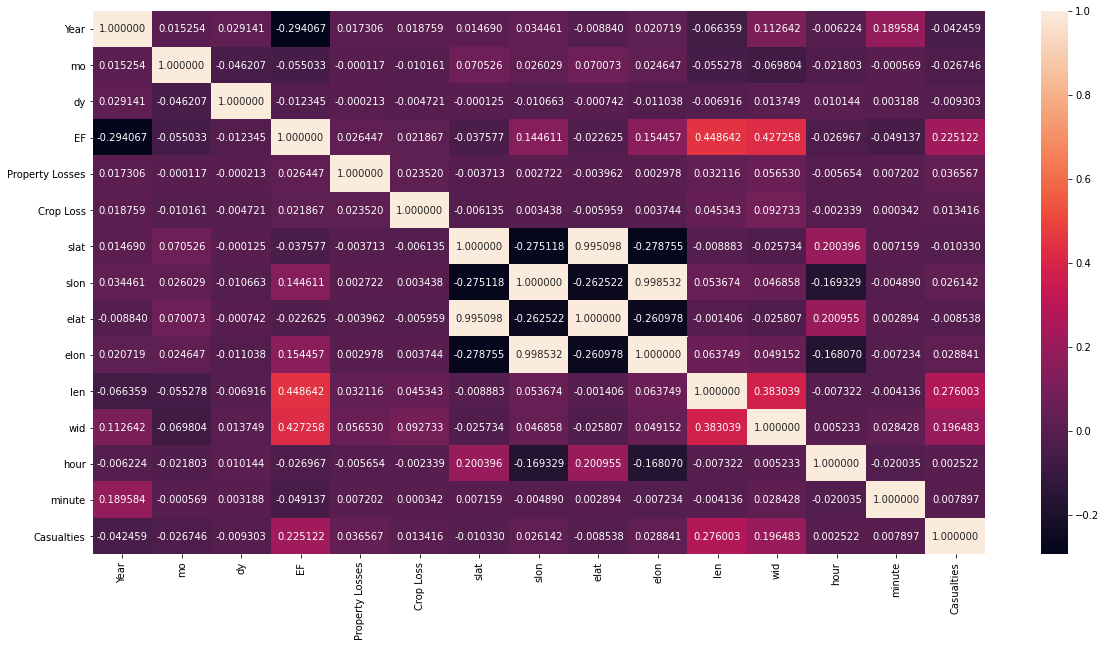

In [25]:
corr = df.corr()
corr = (corr)
a4_dims=(20,10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(corr,annot=True,fmt='f',xticklabels=corr.columns.values,yticklabels=corr.columns.values)

Text(336.9714285714286, 0.5, 'Tornado Magnitude in EF Scale')

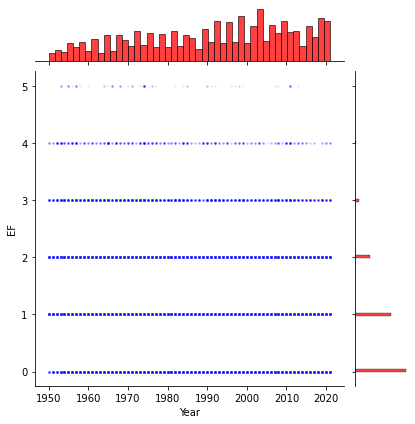

In [26]:
sns.jointplot(x=df['Year'],y=df['EF'],joint_kws={'alpha':0.1,'s':5,'color':'blue'},marginal_kws={'color':'red'})
fig.suptitle("Tornado Magnitude in EF Scale vs Year")
plt.xlabel('Year')
plt.ylabel('Tornado Magnitude in EF Scale')

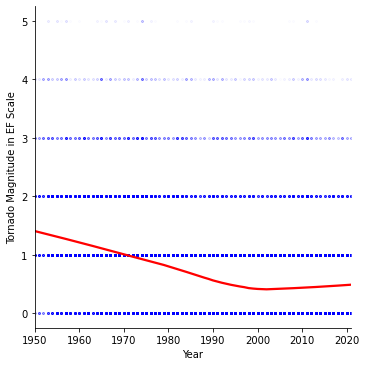

In [27]:
sns.lmplot(data=df,x='Year',y='EF',lowess=True,scatter_kws={'alpha':0.01,'s':5,'color':'blue'},line_kws={'color':'red'})
fig.suptitle("Tornado Magnitude in EF Scale vs Year")
plt.xlabel('Year')
plt.ylabel('Tornado Magnitude in EF Scale')
plt.show()

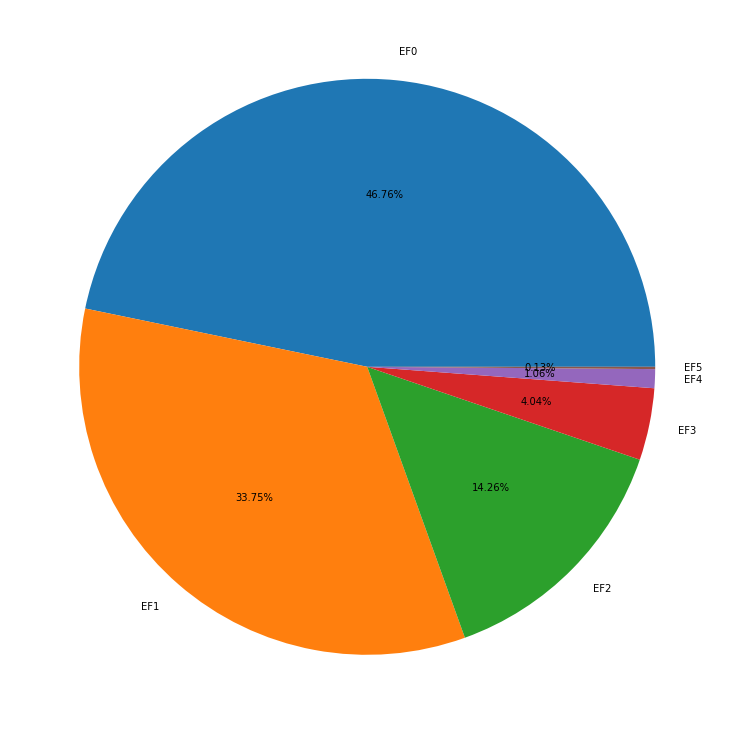

In [28]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Mag = ['EF0', 'EF1', 'EF2', 'EF3', 'EF4','EF5']
ax.pie(df['EF'].value_counts(), labels = Mag,autopct='%1.2f%%')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


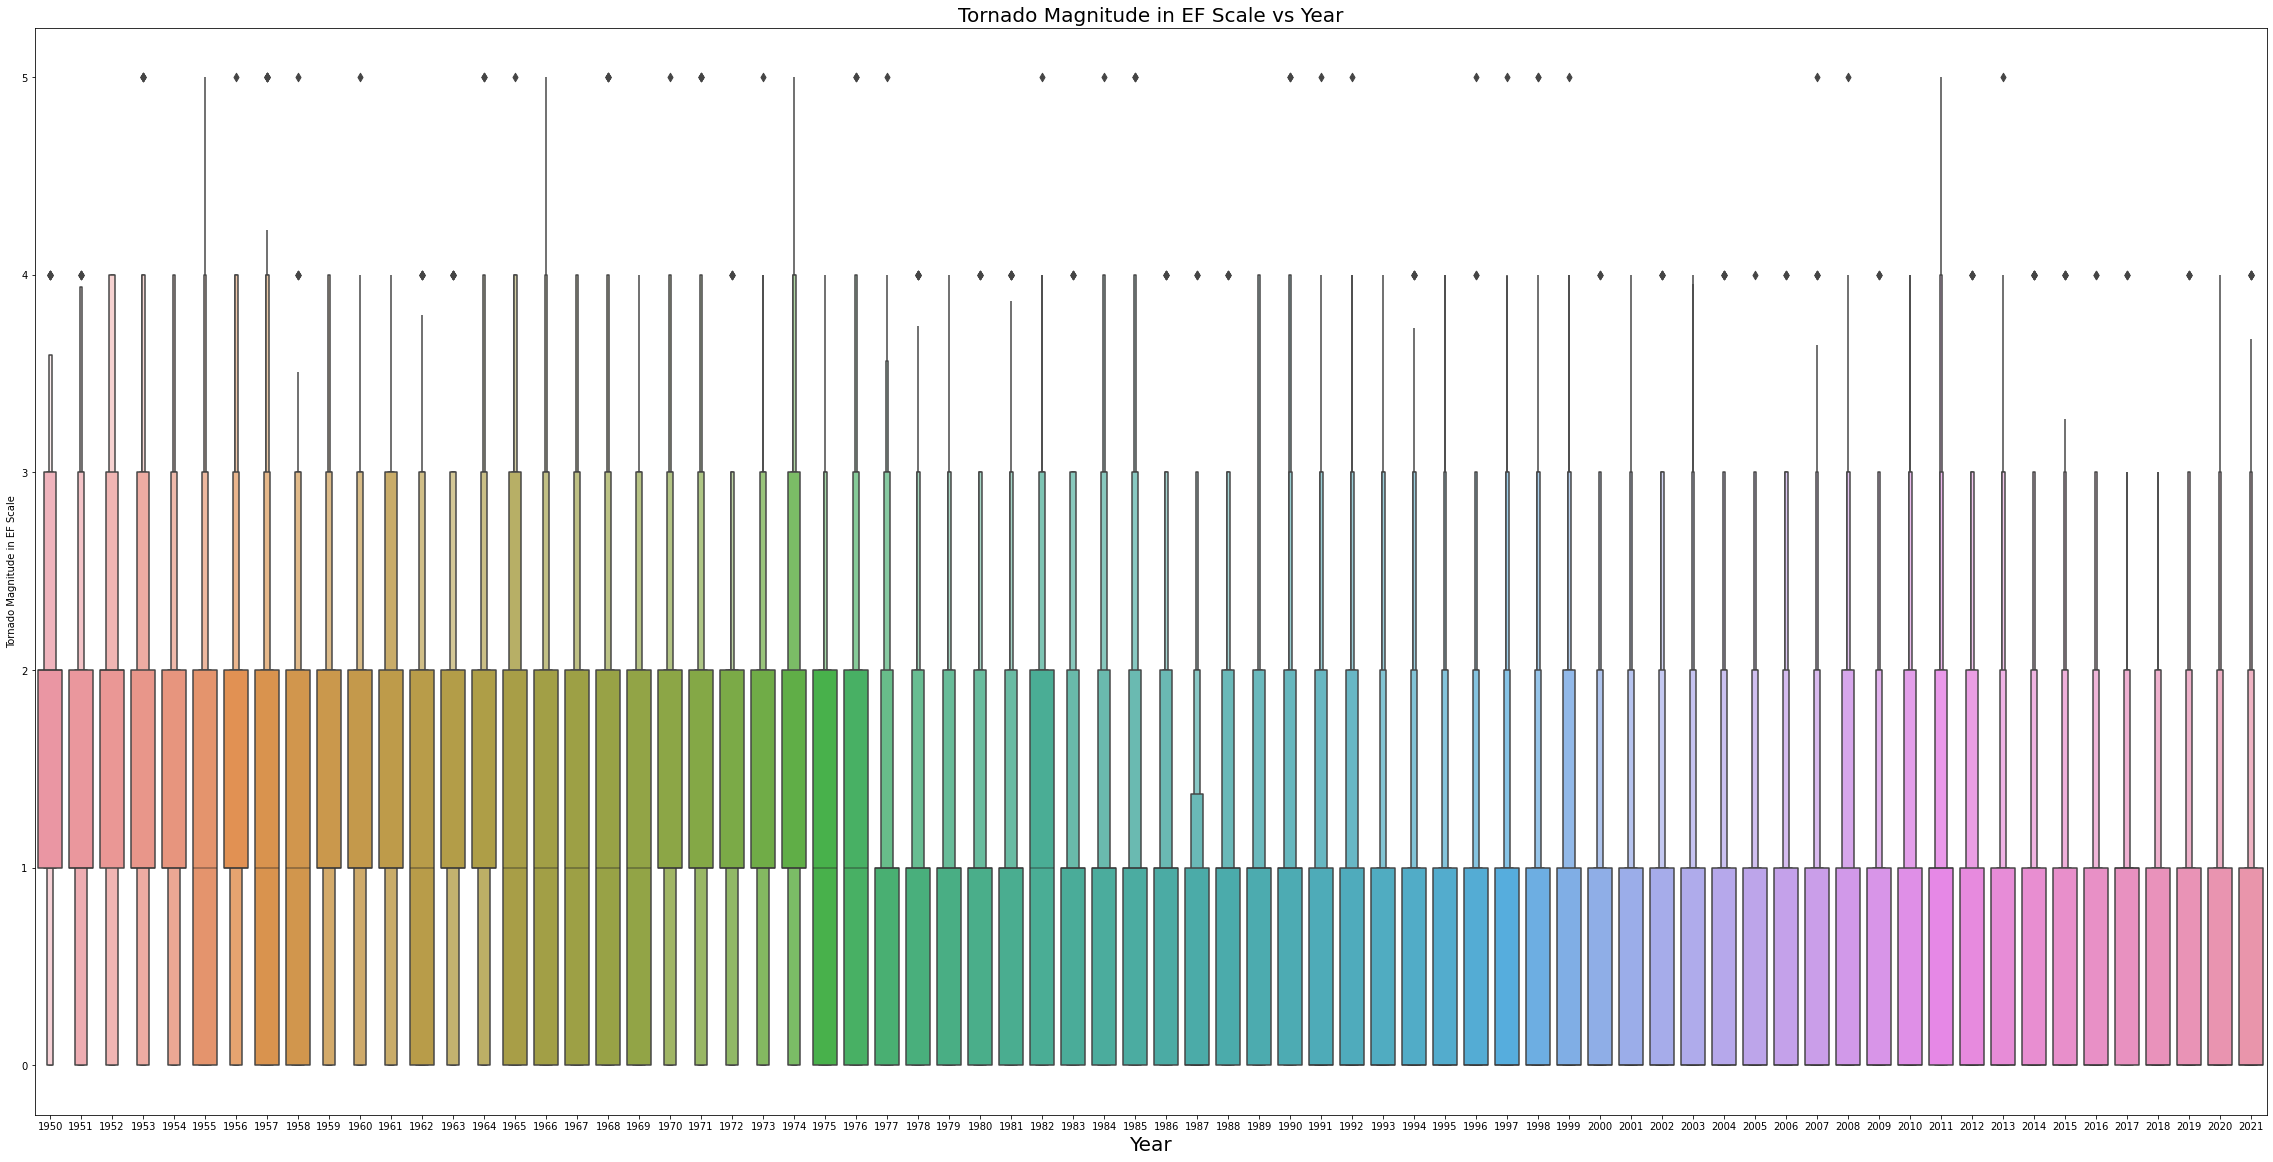

In [29]:
plt.rcParams['figure.figsize']=(40, 20)
plt.style.use('seaborn-dark-palette')
sns.boxenplot(df['Year'], df['EF'])
plt.xlabel('Year', fontsize=20)
plt.ylabel('Tornado Magnitude in EF Scale')
plt.title('Tornado Magnitude in EF Scale vs Year',fontsize=20)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


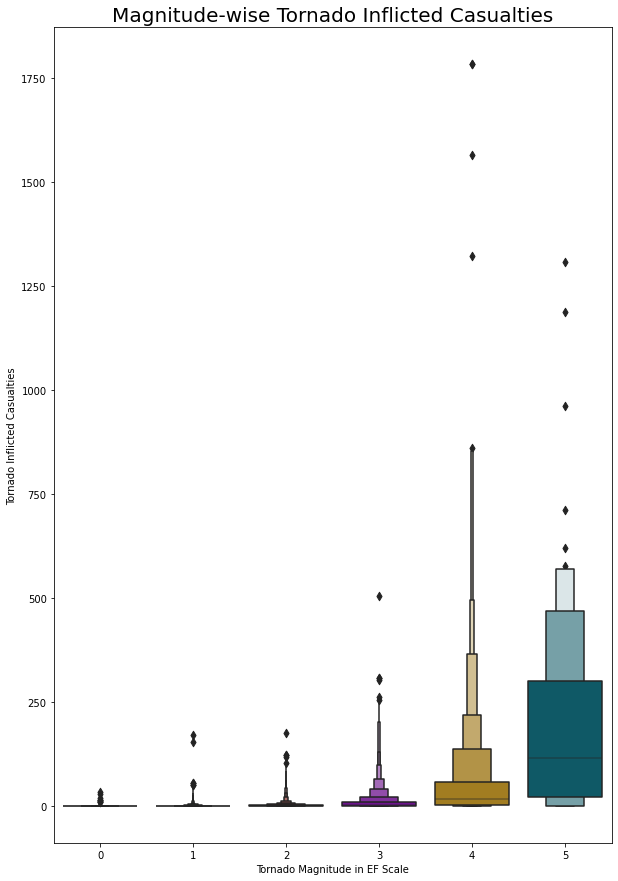

In [30]:
plt.rcParams['figure.figsize']=(10, 15)
plt.style.use('seaborn-dark-palette')
sns.boxenplot(df['EF'],df['Casualties'])
plt.xlabel('Tornado Magnitude in EF Scale')
plt.ylabel('Tornado Inflicted Casualties')
plt.title('Magnitude-wise Tornado Inflicted Casualties',fontsize=20)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


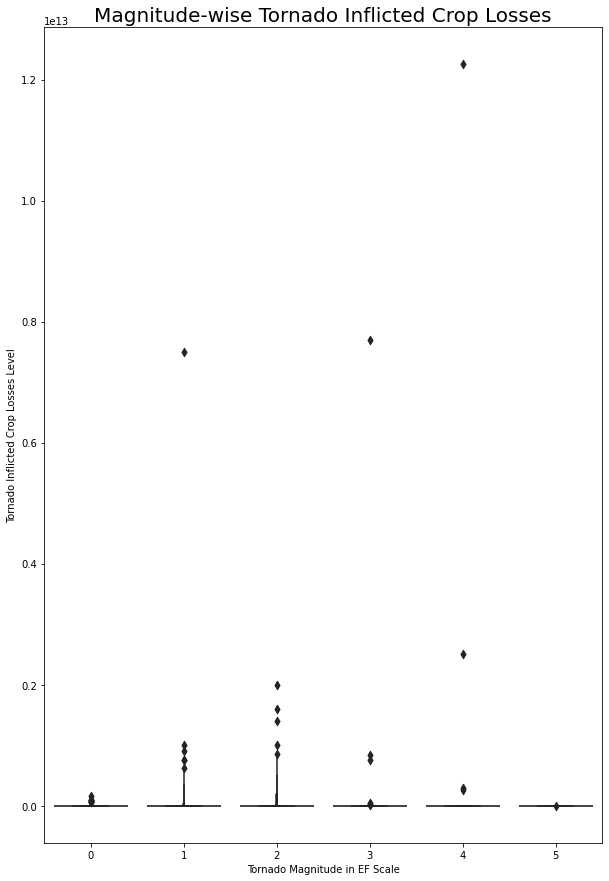

In [30]:
plt.rcParams['figure.figsize']=(10, 15)
plt.style.use('seaborn-dark-palette')
sns.boxenplot(df['EF'],df['Crop Loss'])
plt.xlabel('Tornado Magnitude in EF Scale')
plt.ylabel('Tornado Inflicted Crop Losses Level')
plt.title('Magnitude-wise Tornado Inflicted Crop Losses',fontsize=20)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


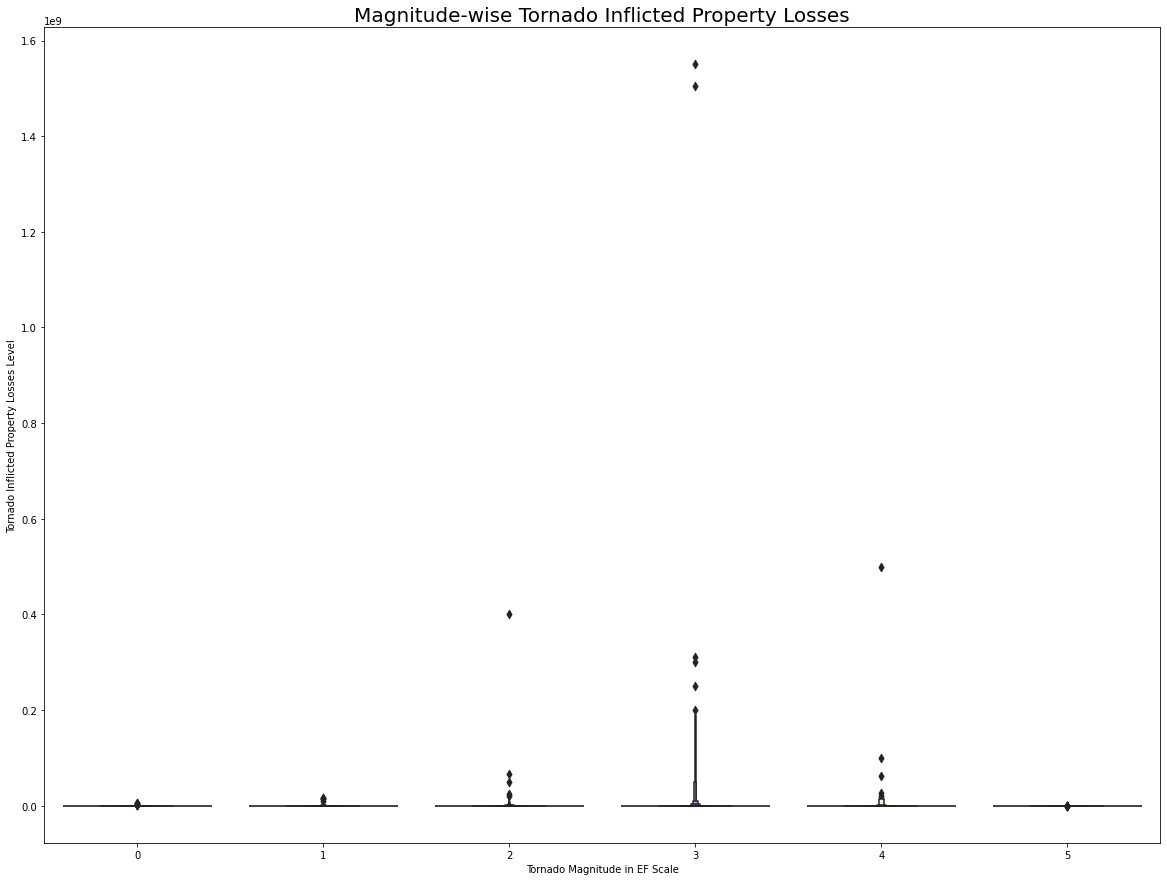

In [31]:
plt.rcParams['figure.figsize']=(20, 15)
plt.style.use('seaborn-dark-palette')
sns.boxenplot(df['EF'],df['Property Losses'])
plt.xlabel('Tornado Magnitude in EF Scale')
plt.ylabel('Tornado Inflicted Property Losses Level')
plt.title('Magnitude-wise Tornado Inflicted Property Losses',fontsize=20)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


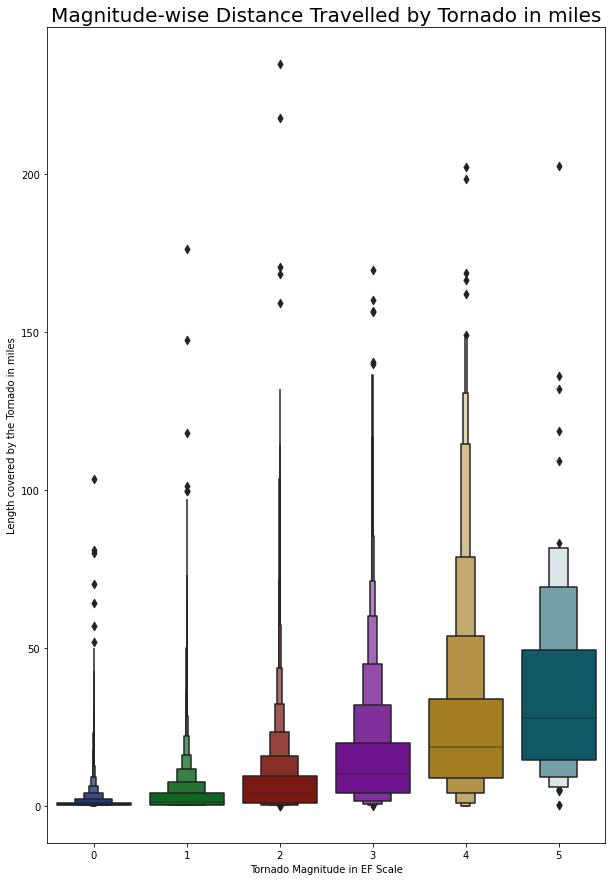

In [32]:
plt.rcParams['figure.figsize']=(10, 15)
plt.style.use('seaborn-dark-palette')
sns.boxenplot(df['EF'],df['len'])
plt.xlabel('Tornado Magnitude in EF Scale')
plt.ylabel('Length covered by the Tornado in miles')
plt.title('Magnitude-wise Distance Travelled by Tornado in miles',fontsize=20)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


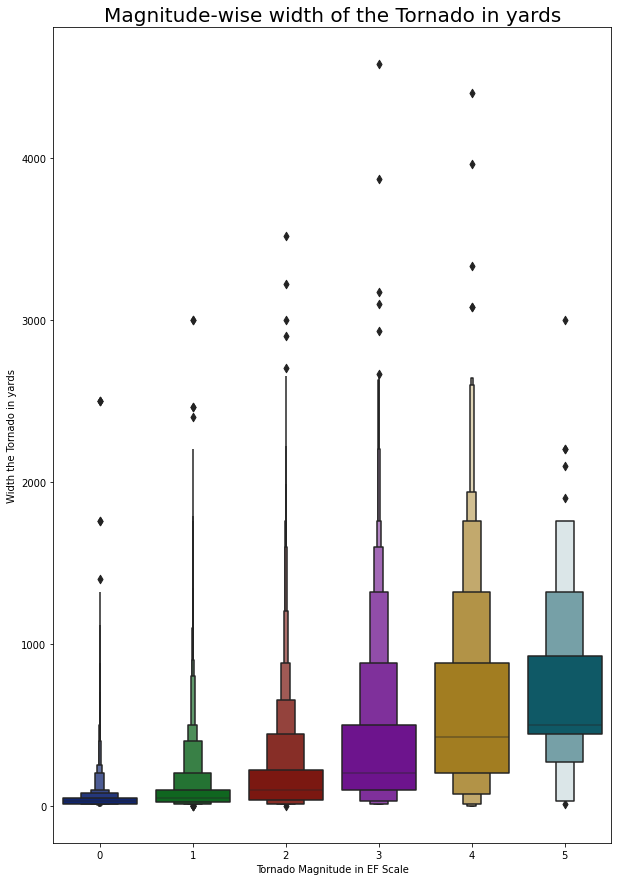

In [33]:
plt.rcParams['figure.figsize']=(10, 15)
plt.style.use('seaborn-dark-palette')
sns.boxenplot(df['EF'],df['wid'])
plt.xlabel('Tornado Magnitude in EF Scale')
plt.ylabel('Width the Tornado in yards')
plt.title('Magnitude-wise width of the Tornado in yards',fontsize=20)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


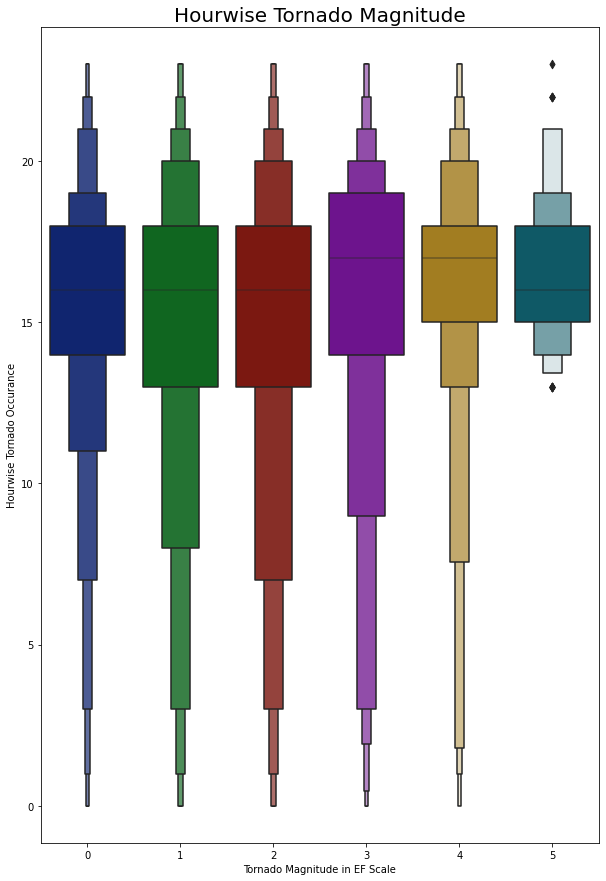

In [34]:
plt.rcParams['figure.figsize']=(10, 15)
plt.style.use('seaborn-dark-palette')
sns.boxenplot(df['EF'],df['hour'])
plt.xlabel('Tornado Magnitude in EF Scale')
plt.ylabel('Hourwise Tornado Occurance')
plt.title('Hourwise Tornado Magnitude',fontsize=20)
plt.show()

In [35]:
df1=df.copy()
df1= pd.get_dummies(df1, columns=['State'])

In [36]:
y1=df1['EF']
X1=df1.drop(['EF'],axis=1)
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,train_size=0.7,shuffle=True,random_state=1)
scaler=StandardScaler()
scaler.fit(X1_train,X1_test)
X1_train_scaled=pd.DataFrame(scaler.transform(X1_train), index=X1_train.index, columns=X1_train.columns)
X1_test_scaled=pd.DataFrame(scaler.transform(X1_test), index=X1_test.index, columns=X1_test.columns)

In [37]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X1_train_scaled, y1_train)
y1_pred_logreg = LogReg.predict(X1_test_scaled)
confusion_matrix1_s_lr = confusion_matrix(y1_test, y1_pred_logreg)
print(confusion_matrix1_s_lr)
print(classification_report(y1_test, y1_pred_logreg))
print('Train Score: ', LogReg.score(X1_train_scaled, y1_train))  
print('Test Score: ', LogReg.score(X1_test_scaled, y1_test))
logreg_accuracy_s_lr = accuracy_score(y1_test,y1_pred_logreg)*100
print('Accuracy acheived by Logistic Regression:',logreg_accuracy_s_lr)

[[8625 1041   20    0    1    0]
 [3334 3458  141    0    0    0]
 [ 577 1957  381    7    0    0]
 [  54  397  383   34   12    0]
 [   3   34  119   33   36    0]
 [   0    1    3    2    8    0]]
              precision    recall  f1-score   support

           0       0.68      0.89      0.77      9687
           1       0.50      0.50      0.50      6933
           2       0.36      0.13      0.19      2922
           3       0.45      0.04      0.07       880
           4       0.63      0.16      0.26       225
           5       0.00      0.00      0.00        14

    accuracy                           0.61     20661
   macro avg       0.44      0.29      0.30     20661
weighted avg       0.57      0.61      0.56     20661

Train Score:  0.6014479225008816


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Score:  0.6066502105416001
Accuracy acheived by Logistic Regression: 60.66502105416001


In [38]:
clf3 = KNeighborsClassifier(n_neighbors=25)
clf3.fit(X1_train_scaled, y1_train)
knc_y1_pred = clf3.predict(X1_test_scaled)
print('Train Score: ', clf3.score(X1_train_scaled, y1_train))  
print('Test Score: ', clf3.score(X1_test_scaled, y1_test))
confusion_matrix1_s_knn = confusion_matrix(y1_test, knc_y1_pred)
print(confusion_matrix1_s_knn)
print(classification_report(y1_test, knc_y1_pred))
print("Accuracy acheived by KNN Neighbour Classifier",(accuracy_score(y1_test,knc_y1_pred)*100))

Train Score:  0.6119650673138756
Test Score:  0.5799816078602197
[[8296 1333   53    3    2    0]
 [3468 3139  312   14    0    0]
 [ 849 1586  456   30    1    0]
 [ 115  375  310   66   13    1]
 [  13   44   81   57   24    6]
 [   0    1    4    2    5    2]]
              precision    recall  f1-score   support

           0       0.65      0.86      0.74      9687
           1       0.48      0.45      0.47      6933
           2       0.38      0.16      0.22      2922
           3       0.38      0.07      0.13       880
           4       0.53      0.11      0.18       225
           5       0.22      0.14      0.17        14

    accuracy                           0.58     20661
   macro avg       0.44      0.30      0.32     20661
weighted avg       0.54      0.58      0.54     20661

Accuracy acheived by KNN Neighbour Classifier 57.99816078602197


In [40]:
rfc=RandomForestClassifier(n_estimators=150,max_features=5)
rfc.fit(X1_train_scaled,y1_train)
y1_pred_rfc=rfc.predict(X1_test_scaled)
rfc_result1 = confusion_matrix(y1_test, y1_pred_rfc)
print("Confusion Matrix:")
print(rfc_result1)
result_rfc1 = classification_report(y1_test, y1_pred_rfc)
print("Classification Report:",)
print (result_rfc1)
rfc_accuracy1 = accuracy_score(y1_test,y1_pred_rfc)
print("Accuracy by random forest classifier:",rfc_accuracy1*100)

Confusion Matrix:
[[8390 1268   29    0    0    0]
 [1190 5269  463   11    0    0]
 [  86 1668 1111   53    4    0]
 [   9  203  454  195   19    0]
 [   1   20   66   69   69    0]
 [   0    0    1    4    5    4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      9687
           1       0.63      0.76      0.69      6933
           2       0.52      0.38      0.44      2922
           3       0.59      0.22      0.32       880
           4       0.71      0.31      0.43       225
           5       1.00      0.29      0.44        14

    accuracy                           0.73     20661
   macro avg       0.72      0.47      0.53     20661
weighted avg       0.72      0.73      0.72     20661

Accuracy by random forest classifier: 72.78447316199603


In [50]:
forest = RandomForestClassifier(criterion = 'gini', 
                                n_estimators = 100, 
                                random_state = 1)

In [53]:
forest.fit(X1_train, y1_train)

RandomForestClassifier(random_state=1)

In [55]:
# Predict on test data.
y_predict_forest = forest.predict(X1_test)

# Look at the first few predictions.
print(y_predict_forest[0:5,])


[1 0 1 1 0]


In [57]:
from sklearn import metrics

In [58]:

# Take a look at test data confusion matrix.
conf_matrix_forest = metrics.confusion_matrix(y1_test, y_predict_forest)
print(conf_matrix_forest)
accuracy_forest = metrics.accuracy_score(y1_test, y_predict_forest)
print("Accuracy for random forest on test data: ", accuracy_forest)

[[9163  519    5    0    0    0]
 [ 781 5560  589    3    0    0]
 [  50 1543 1302   25    1    1]
 [   3   55   80  739    3    0]
 [   1    6   12   37  169    0]
 [   0    0    4    1    0    9]]
Accuracy for random forest on test data:  0.8199990319926431


In [61]:
acc_train_forest = forest.score(X1_train, y1_train)
print ("Train Accuracy:", acc_train_forest)

Train Accuracy: 0.9999377683738876


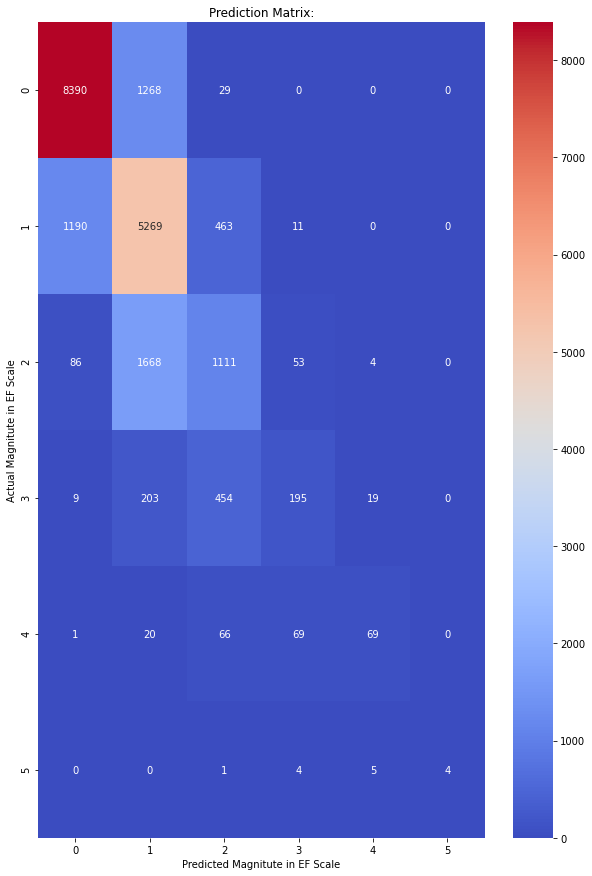

In [41]:
sns.heatmap(rfc_result1,annot=True,fmt="d",cmap='coolwarm')
plt.title('Prediction Matrix:')
plt.ylabel('Actual Magnitute in EF Scale')
plt.xlabel('Predicted Magnitute in EF Scale')
plt.show()

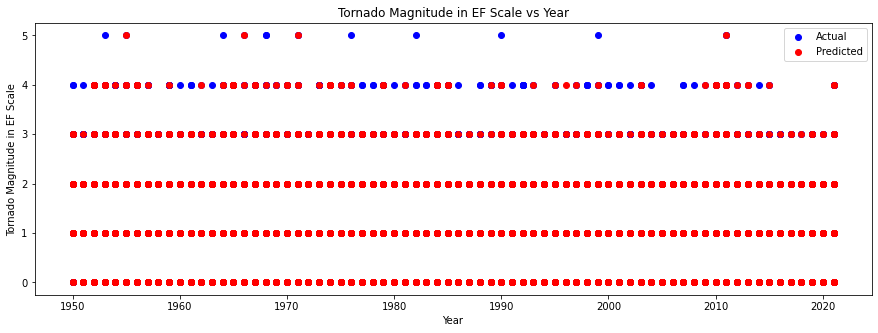

In [42]:
plt.figure(figsize=(15,5))
plt.scatter(X1_test['Year'],y1_test, color='blue', label='Actual')
plt.scatter(X1_test['Year'],y1_pred_rfc, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Tornado Magnitude in EF Scale')
plt.title('Tornado Magnitude in EF Scale vs Year')
plt.legend()

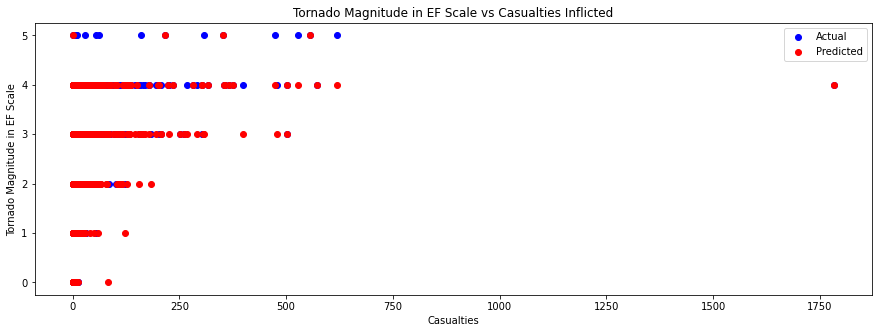

In [43]:
plt.figure(figsize=(15,5))
plt.scatter(X1_test['Casualties'],y1_test, color='blue', label='Actual')
plt.scatter(X1_test['Casualties'],y1_pred_rfc, color='red', label='Predicted')
plt.xlabel('Casualties')
plt.ylabel('Tornado Magnitude in EF Scale')
plt.title('Tornado Magnitude in EF Scale vs Casualties Inflicted')
plt.legend()
plt.show()

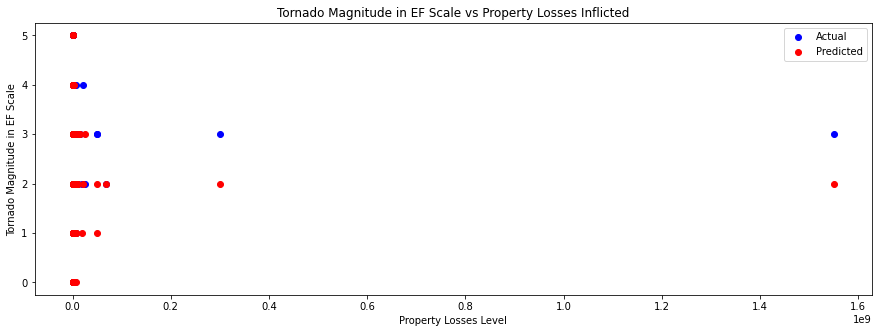

In [44]:
plt.figure(figsize=(15,5))
plt.scatter(X1_test['Property Losses'],y1_test, color='blue', label='Actual')
plt.scatter(X1_test['Property Losses'],y1_pred_rfc, color='red', label='Predicted')
plt.xlabel('Property Losses Level')
plt.ylabel('Tornado Magnitude in EF Scale')
plt.title('Tornado Magnitude in EF Scale vs Property Losses Inflicted')
plt.legend()
plt.show()

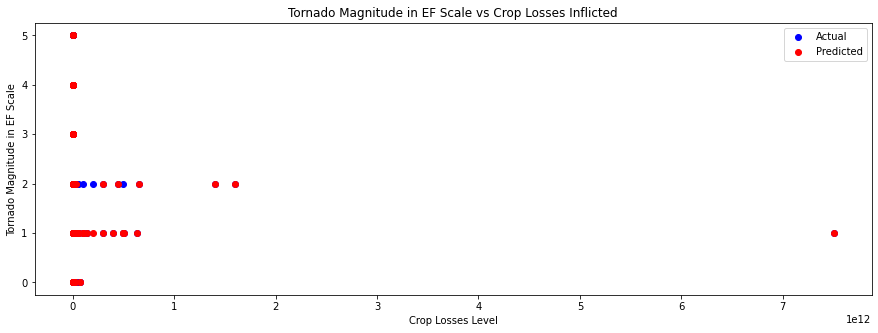

In [45]:
plt.figure(figsize=(15,5))
plt.scatter(X1_test['Crop Loss'],y1_test, color='blue', label='Actual')
plt.scatter(X1_test['Crop Loss'],y1_pred_rfc, color='red', label='Predicted')
plt.xlabel('Crop Losses Level')
plt.ylabel('Tornado Magnitude in EF Scale')
plt.title('Tornado Magnitude in EF Scale vs Crop Losses Inflicted')
plt.legend()
plt.show()